In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('housing_data.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [4]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [5]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

<Axes: xlabel='GarageQual'>

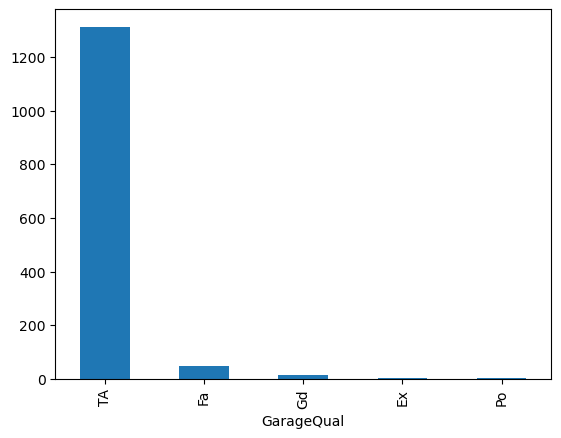

In [6]:
df['GarageQual'].value_counts().plot.bar()

<Axes: ylabel='Density'>

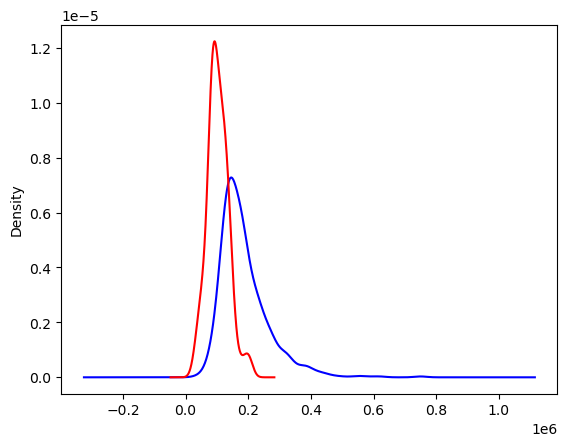

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual']== 'TA']['SalePrice'].plot(kind='kde',ax=ax,color='blue')
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='red')

In [15]:
temp = df[df['GarageQual'] == 'TA']['SalePrice']

In [20]:
df['GarageQual'].isnull().fillna('TA', inplace=True)

In [28]:
df

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000
...,...,...,...
1455,TA,TA,175000
1456,TA,TA,210000
1457,Gd,TA,266500
1458,NaN,TA,142125


<Axes: xlabel='GarageQual'>

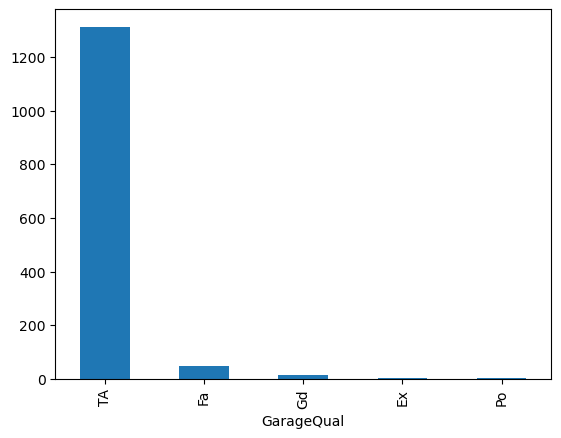

In [22]:
df['GarageQual'].value_counts().plot.bar()

Text(0.5, 1.0, 'Garage Quality: TA vs Missing')

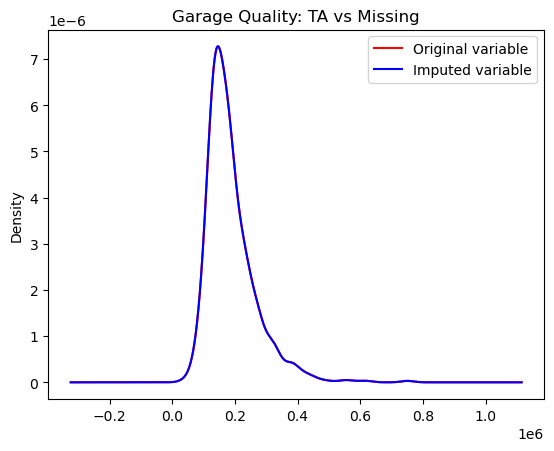

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind='kde',ax=ax,color='red')
df[df['GarageQual']== 'TA']['SalePrice'].plot(kind='kde',ax=ax,color='blue')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

plt.title('Garage Quality: TA vs Missing')

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [31]:
from sklearn.impute import SimpleImputer

In [32]:
imputer = SimpleImputer(strategy='most_frequent')

In [33]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

c:\Users\saqli\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [34]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)